# The network of charge stations in Catalonia (GENCAT)

In this project I will analyse the most recent database published by the government (4th December 2015) state of the charging stations in catalonia.
The data is provided by the Open Data project from "Generalitat de Catalunya".

In [1]:
import numpy as np
import pandas as pd
import csv
import sys

# DATA CLEANING
data = './data/xarxa.csv'
#np.loadtxt(data, skiprows=1, delimiter=';', usecols=(1,2,3))
df = pd.read_csv(data,';',encoding='latin-1');
df = df.dropna(axis=0,how='all');
df = df.drop(df.columns[[0,1,2,3,6,7,8,9,10,11,13,15,16,17,18]],1)
df

,LATITUD,LONGITUD,MUNICIPI,NPLACES
0,41.401478,2.156578,Barcelona,1
1,41.398969,2.153493,Barcelona,1
2,41.379559,2.162010,Barcelona,1
3,41.385654,2.177128,Barcelona,3
4,41.382126,2.168188,Barcelona,3
5,41.379272,2.169613,Barcelona,4
6,41.375320,2.169709,Barcelona,1
7,41.383144,2.150551,Barcelona,1
8,41.390085,2.143525,Barcelona,1
9,41.401794,2.160702,Barcelona,1


In [2]:
# add an index that will be the id
df['id'] = df.index
df

,LATITUD,LONGITUD,MUNICIPI,NPLACES,id
0,41.401478,2.156578,Barcelona,1,0
1,41.398969,2.153493,Barcelona,1,1
2,41.379559,2.162010,Barcelona,1,2
3,41.385654,2.177128,Barcelona,3,3
4,41.382126,2.168188,Barcelona,3,4
5,41.379272,2.169613,Barcelona,4,5
6,41.375320,2.169709,Barcelona,1,6
7,41.383144,2.150551,Barcelona,1,7
8,41.390085,2.143525,Barcelona,1,8
9,41.401794,2.160702,Barcelona,1,9


# Calculate edge weights as distances between points
Each point will be a node, and each node will be connected with all other nodes (or with the nearest one, we will see...) with a weighted edge. The weight will be the distance in KM.
Each node connected to the nodes that have distance(nodeA,nodeB)<car_autonomy

For readibility only 3 connections per node

In [3]:
car_autonomy = 100 # kms
max_connections = 20

In [4]:
from geopy.distance import vincenty
from geopy.distance import great_circle
import networkx as nx
mat = df.as_matrix();
ncols = mat[1].size
nrows = len(mat)
print "item:",mat[1][2],nrows,ncols
mat_distances = np.zeros((nrows,nrows))
mat_distances_GC = np.zeros((nrows,nrows))

G = nx.Graph()
for i in range(nrows):
    G.add_node(df['id'][i],capacity=df['NPLACES'][i])
    G.add_node
for i in range(nrows):
    n = 0
    for j in range(nrows):
        nodeA =[mat[i][0],mat[i][1]]
        nodeB =[mat[j][0],mat[j][1]]
        mat_distances[i][j] = vincenty(nodeA,nodeB).kilometers
        #if mat_distances[i][j] > 0.0 and mat_distances[i][j] < car_autonomy:
            #G.add_edge(df['id'][i],df['id'][j],weight=mat_distances[i][j])
            #n += 1
#print mat_distances

item: Barcelona 295 5


In [5]:
# functions to get the indexes and values of the n lowest distances of a matrix
def n_max(arr, n):
    indices = arr.ravel().argsort()[-n:]
    indices = (np.unravel_index(i, arr.shape) for i in indices)
    return [(arr[i], i) for i in indices]
# return only a list of indices of the lowest vals
def n_min(arr, n):
    n += 1
    indices = arr.ravel().argsort()[:n]
    indices = (np.unravel_index(i, arr.shape) for i in indices)
    return [i[0] for i in indices]
print n_max(mat_distances[1],3)
print n_min(mat_distances[1],3)

[(128.95351915769177, (260,)), (138.75890268204313, (262,)), (159.70893417383724, (258,))]
[1, 0, 130, 122]


In [6]:
print "Number of nodes:",G.number_of_nodes()
print "Number of edges:",G.number_of_edges()

Number of nodes: 295
Number of edges: 0


In [7]:
for i in range(nrows):
    indx = n_min(mat_distances[i],max_connections)
    for j in indx:
        if i!=j and mat_distances[i][j]<car_autonomy:
            G.add_edge(df['id'][i],df['id'][j],weight=mat_distances[i][j])
print G.number_of_edges()

3869


In [8]:
print pd.DataFrame(mat_distances)

            0           1           2           3           4           5    \
0      0.000000    0.379739    2.476387    2.458120    2.358411    2.696450   
1      0.379739    0.000000    2.270351    2.468630    2.238227    2.569684   
2      2.476387    2.270351    0.000000    1.434350    0.590222    0.636796   
3      2.458120    2.468630    1.434350    0.000000    0.844208    0.947383   
4      2.358411    2.238227    0.590222    0.844208    0.000000    0.338657   
5      2.696450    2.569684    0.636796    0.947383    0.338657    0.000000   
6      3.105811    2.956022    0.797771    1.304749    0.766534    0.438987   
7      2.097665    1.774688    1.037931    2.240429    1.479609    1.651479   
8      1.671132    1.291694    1.938360    2.853314    2.244275    2.490737   
9      0.346640    0.679604    2.471874    2.258397    2.272297    2.609997   
10     3.623443    3.653058    2.267732    1.186860    1.767331    1.633020   
11     3.198965    2.849840    1.693644    3.118104 

In [9]:
# simple try to find path between two nodes
print "Route from Esterri d'Àneu to L'Ampolla:"
try:
    list_ids = nx.shortest_path(G,258,262,weight=True)
    for i in list_ids:
        print "Id:\t",i,"\tMunicipi:\t",df['MUNICIPI'][i]
except nx.NetworkXNoPath:
    print 'No path'


Route from Esterri d'Àneu to L'Ampolla:
Id:	258 	Municipi:	Esterri d'Àneu
Id:	254 	Municipi:	Ripoll
Id:	284 	Municipi:	Manresa
Id:	193 	Municipi:	Igualada
Id:	263 	Municipi:	Montblanc
Id:	262 	Municipi:	L'Ampolla


In [44]:
import folium
from IPython.display import HTML
import folium
 
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))
 
def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))
fmap=folium.Map(location=[41.7, 2],zoom_start=7)
def plotmarker(row):
    fmap.add_children( [row['LATITUD'], row['LONGITUD']] )
    
# "for" loops are common to a wide variety of proramming languages, allowing you to do something a particular number
# of times or for each item in a list or set of things.
#The iterrows() method enables you to iterate through each row in the dataframe.
#This allows you to do something to each row in turn
#iterrows() actually returns a couple of items at each pass - the row index value, and the row values by column name
#We want to access the second of those items, the row values by column name, so count to the second item: 0,1,..
#Once we have that second item, we need to say which column value we want from the row

for row in df.iterrows():
    popup_txt = str(row[1]['id'])+ " " +row[1]['MUNICIPI']
    #The 'latitude' and 'longitude' names correspond to column names in the original dataframe
    latlon = [ row[1]['LATITUD'], row[1]['LONGITUD'] ]
    fmap.simple_marker( latlon,popup= popup_txt )
embed_map(fmap)

C:\Users\alsol\Anaconda2\lib\site-packages\ipykernel\__main__.py:40: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
C:\Users\alsol\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: Map.create_map is deprecated. Use Map.save instead


In [11]:
from matplotlib import pyplot as plt

pos = nx.spring_layout(G)
#pos = nx.get_node_attributes(G,'posxy')
nx.draw(G,pos)


plt.savefig('CN_final.png',dpi=1000)
plt.show()

In [13]:
import igraph
net_final = igraph.read('gephy_final.net',format='pajek')

In [14]:
# plotting only working under linux (at least on my configuration)
net_layout = net_final.layout("kk")
labels = [v['id'] for v in net_final.vs]
#igraph.plot(net_final,"net_final.png",vertex_color="cyan", vertex_label = labels, layout = net_layout)

TypeError: plotting not available

In [15]:
# function to export to .clu by a received list of numbers that refer to a cluster
def export_to_clu(list1,file_name):
    out = '*Vertices ' + str(len(list1)) + '\n'
    for a in list1:
        out += str(a+1)+'\n'
    text_file = open(file_name, "w")
    text_file.write(out)
    text_file.close()

In [17]:
from igraph import *
# Community multilevel
com_final = net_final.community_multilevel()
print "Community:"
print com_final
print "Membership:"
print com_final.membership
print "Number of communities:", max(com_final.membership)+1
mem_final = com_final.membership
print "Modularity:", com_final.modularity
#igraph.plot(com_final,"clu_multilevel_final.png", vertex_label = labels,layout = net_layout)
export_to_clu(mem_final,"clu_multilevel_final.clu")

Community:
Clustering with 295 elements and 6 clusters
[0] 2, 3, 4, 5, 6, 10, 11, 15, 22, 24, 27, 28, 30, 31, 40, 45, 47, 53, 67, 68,
    70, 71, 73, 74, 78, 81, 98, 99, 107, 108, 125, 128, 141, 144, 145, 155,
    156, 157, 167, 169, 170, 174, 181, 182, 184, 187, 188, 189, 197, 198, 199,
    200, 227, 228, 234, 235, 244, 280, 293, 294
[1] 20, 23, 25, 26, 33, 34, 36, 38, 41, 42, 46, 48, 49, 51, 52, 56, 57, 58,
    60, 63, 64, 65, 66, 72, 77, 89, 90, 91, 92, 93, 94, 95, 96, 97, 103, 105,
    106, 111, 112, 123, 124, 127, 131, 132, 133, 134, 135, 136, 137, 139, 150,
    151, 152, 162, 163, 185, 208, 225, 226, 232, 286, 290
[2] 0, 1, 7, 8, 9, 12, 13, 14, 16, 17, 18, 19, 21, 29, 32, 35, 37, 39, 43, 44,
    50, 54, 55, 59, 61, 62, 69, 75, 76, 79, 80, 82, 83, 84, 85, 86, 87, 88,
    100, 101, 102, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
    126, 129, 130, 140, 142, 143, 146, 147, 148, 149, 153, 154, 158, 159, 160,
    161, 165, 166, 168, 171, 172, 173
[3] 175, 176, 177, 17

In [18]:
import community

g = net_final

partition = net_final.community_multilevel()
print "Louvain Partition: ", partition
print len(partition)
print partition[0][0]
clusts = {}
for i in range(len(partition)):
    for j in range(len(partition[i])):
        clusts[partition[i][j]]=i
print clusts.values()
df['cluster']=clusts.values()

Louvain Partition:  Clustering with 295 elements and 6 clusters
[0] 2, 3, 4, 5, 6, 10, 11, 15, 22, 24, 27, 28, 30, 31, 40, 45, 47, 53, 67, 68,
    70, 71, 73, 74, 78, 81, 98, 99, 107, 108, 125, 128, 141, 144, 145, 155,
    156, 157, 167, 169, 170, 174, 181, 182, 184, 187, 188, 189, 197, 198, 199,
    200, 227, 228, 234, 235, 244, 280, 293, 294
[1] 20, 23, 25, 26, 33, 34, 36, 38, 41, 42, 46, 48, 49, 51, 52, 56, 57, 58,
    60, 63, 64, 65, 66, 72, 77, 89, 90, 91, 92, 93, 94, 95, 96, 97, 103, 105,
    106, 111, 112, 123, 124, 127, 131, 132, 133, 134, 135, 136, 137, 139, 150,
    151, 152, 162, 163, 185, 208, 225, 226, 232, 286, 290
[2] 0, 1, 7, 8, 9, 12, 13, 14, 16, 17, 18, 19, 21, 29, 32, 35, 37, 39, 43, 44,
    50, 54, 55, 59, 61, 62, 69, 75, 76, 79, 80, 82, 83, 84, 85, 86, 87, 88,
    100, 101, 102, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
    126, 129, 130, 140, 142, 143, 146, 147, 148, 149, 153, 154, 158, 159, 160,
    161, 165, 166, 168, 171, 172, 173
[3] 175, 176

In [19]:
print df

       LATITUD  LONGITUD                MUNICIPI  NPLACES   id  cluster
0    41.401478  2.156578               Barcelona        1    0        2
1    41.398969  2.153493               Barcelona        1    1        2
2    41.379559  2.162010               Barcelona        1    2        0
3    41.385654  2.177128               Barcelona        3    3        0
4    41.382126  2.168188               Barcelona        3    4        0
5    41.379272  2.169613               Barcelona        4    5        0
6    41.375320  2.169709               Barcelona        1    6        0
7    41.383144  2.150551               Barcelona        1    7        2
8    41.390085  2.143525               Barcelona        1    8        2
9    41.401794  2.160702               Barcelona        1    9        2
10   41.379936  2.189115               Barcelona        1   10        0
11   41.374588  2.142870               Barcelona        1   11        0
12   41.385727  2.142850               Barcelona        1   12  

In [111]:
df['MUNICIPI']=df['MUNICIPI'].str.title()
out = pd.DataFrame()
aux = []
for a in set(df['MUNICIPI']):
    #print sum(df.loc[df['MUNICIPI']==u'Barcelona']['NPLACES'])
    aux.append([a,sum(df.loc[(df['MUNICIPI'])==a]['NPLACES']),df.loc[df['MUNICIPI']==a]['LATITUD'].values[0],df.loc[df['MUNICIPI']==a]['LONGITUD'].values[0]])
pd.set_option('display.max_rows',len(aux))
dataframe_out = pd.DataFrame(aux,columns=['TOWN','SPOTS','LATITUDE','LONGITUDE'])
 #pd.reset_option('display.max_rows')
dataframe_out.to_csv('grouped_map.csv',encoding='utf8')

In [113]:
from IPython.display import IFrame
IFrame('https://alsolanes.cartodb.com/viz/f38f4684-3b07-11e6-b9b5-0e31c9be1b51/embed_map', width=700, height=350)
#<iframe width="100%" height="520" frameborder="0" src="https://alsolanes.cartodb.com/viz/f38f4684-3b07-11e6-b9b5-0e31c9be1b51/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>

In [20]:
in_degrees = G.degree() # dictionary node:degree
in_values = sorted(set(in_degrees.values()))
in_hist = [in_degrees.values().count(x) for x in in_values]
plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Charger stations degree distribution')
plt.savefig('final_CN_degree_distribution.pdf')
plt.show()
plt.close()

In [21]:
# Clustering coefficient of node 0
print "Clustering coefficient of node 0:",nx.clustering(G, 0)
# Clustering coefficient of all nodes (in a dictionary)
clust_coefficients = nx.clustering(G)
#print "Clustering coefficient of all nodes:",nx.clustering(G)
# Average clustering coefficient
ccs = nx.clustering(G)
print "Average clustering degree:",sum(ccs.values()) / len(ccs)

Clustering coefficient of node 0: 0.621082621083
Average clustering degree: 0.666651031516


In [22]:
graph_components = nx.connected_component_subgraphs(G)
graph_mc = G[0]
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G)
# Closeness centrality
clo_cen = nx.closeness_centrality(G)
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G)

In [23]:
def highest_centrality(cent_dict):
     """Returns a tuple (node,value) with the node
     with largest value from Networkx centrality dictionary."""
     # Create ordered tuple of centrality data
     cent_items=[(b,a) for (a,b) in cent_dict.iteritems()]
     # Sort in descending order
     cent_items.sort()
     cent_items.reverse()
     return tuple(reversed(cent_items[0]))

In [24]:
most_central = highest_centrality(nx.to_dict_of_dicts(G))
print df.loc[df['id'] == most_central[0]]
print "\nContains ",G.degree(231)," connected nodes."

     LATITUD  LONGITUD             MUNICIPI  NPLACES   id  cluster
231  41.6995    2.3834  Sant Pere Vilamajor        2  231        3

Contains  38  connected nodes.


In [41]:
colors = ['blue','red','yellow','green','purple','orange','cyan']

In [43]:
fmap=folium.Map(location=[41.7, 2],zoom_start=7)
for row in df.iterrows():
    popup_txt = str(row[1]['id'])+ " " +row[1]['MUNICIPI']
    #The 'latitude' and 'longitude' names correspond to column names in the original dataframe
    latlon = [ row[1]['LATITUD'], row[1]['LONGITUD'] ]
    fmap.simple_marker( latlon,marker_color=colors[row[1]['cluster']],popup= popup_txt )
embed_map(fmap,'map_clusters.html')

C:\Users\alsol\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
C:\Users\alsol\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: Map.create_map is deprecated. Use Map.save instead


# Real roads information
Comes from geofabrik shp data

In [25]:
# import the packages
import networkx as nx
import numpy as np
import pandas as pd
import json
import smopy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import gdal
mpl.rcParams['figure.dpi'] = mpl.rcParams['savefig.dpi'] = 300

In [26]:
# load data (a shapefile dataset) with networkx.
# contains info about roads in spain
# returns a graph, where each node is a geographical position, and each edge 
# contains information about the road linking the two nodes.
g = nx.read_shp("./data/ESP_roads.shp")

In [27]:
# connected graph to compute shortest paths.largest connected subgraph
sg = list(nx.connected_component_subgraphs(g.to_undirected()))[0]
len(sg)

2328

In [28]:
# two positions to find shortest path
id1 = 254
id2 = 261
out = []
def pos_i_list(list_ids):
    for itm in list_ids:
        out.append((df['LATITUD'][itm], df['LONGITUD'][itm]))
    return out
def pos_i(itm):
    return (df['LATITUD'][itm], df['LONGITUD'][itm])
print pos_i(12)

(41.385727000000003, 2.1428500000000001)


In [29]:
# each edge contains info about road.
def get_path(n0, n1):
    """If n0 and n1 are connected nodes in the graph, this function
    return an array of point coordinates along the road linking
    these two nodes."""
    return np.array(json.loads(sg[n0][n1]['Json'])['coordinates'])
# use road to compute length
EARTH_R = 6372.8
def geocalc(lat0, lon0, lat1, lon1):
    """Return the distance (in km) between two points in 
    geographical coordinates."""
    lat0 = np.radians(lat0)
    lon0 = np.radians(lon0)
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    dlon = lon0 - lon1
    y = np.sqrt(
        (np.cos(lat1) * np.sin(dlon)) ** 2
         + (np.cos(lat0) * np.sin(lat1) 
         - np.sin(lat0) * np.cos(lat1) * np.cos(dlon)) ** 2)
    x = np.sin(lat0) * np.sin(lat1) + \
        np.cos(lat0) * np.cos(lat1) * np.cos(dlon)
    c = np.arctan2(y, x)
    return EARTH_R * c

# compute path's length
def get_path_length(path):
    return np.sum(geocalc(path[1:,0], path[1:,1],
                          path[:-1,0], path[:-1,1]))

def get_full_path(path):
    """Return the positions along a path."""
    p_list = []
    curp = None
    for i in range(len(path)-1):
        p = get_path(path[i], path[i+1])
        if curp is None:
            curp = p
        if np.sum((p[0]-curp)**2) > np.sum((p[-1]-curp)**2):
            p = p[::-1,:]
        p_list.append(p)
        curp = p[-1]
    return np.vstack(p_list)

In [30]:
# Compute the length between any two connected nodes.
def get_route_electric(list_ids):
    total_dist = []
    final_path = []
    for n0, n1 in sg.edges_iter():
            path = get_path(n0, n1)
            distance = get_path_length(path)
            sg.edge[n0][n1]['distance'] = distance
    for indx in xrange(0,len(list_ids)-1):
        
        pos0 = pos_i(list_ids[indx])
        pos1 = pos_i(list_ids[indx+1])
        
        nodes = np.array(sg.nodes())
        # Get the closest nodes in the graph.
        pos0_i = np.argmin(np.sum((nodes[:,::-1] - pos0)**2, axis=1))
        pos1_i = np.argmin(np.sum((nodes[:,::-1] - pos1)**2, axis=1))
        # Compute the shortest path.
        path = nx.shortest_path(sg, 
                                source=tuple(nodes[pos0_i]), 
                                target=tuple(nodes[pos1_i]),
                                weight='distance')
        final_path.append(path)
        roads = pd.DataFrame([sg.edge[path[i]][path[i + 1]] 
                      for i in range(len(path) - 1)], 
                     columns=['distance'])
        total_dist.append(roads['distance'].sum())
    return [final_path,total_dist]

In [33]:
# simple try to find path between two nodes
print "Route from Esterri d'Àneu to L'Ampolla:"
try:
    list_ids = nx.shortest_path(G,258,262,weight=True)
    for i in list_ids:
        print "Id:\t",i,"\tMunicipi:\t",df['MUNICIPI'][i]
except nx.NetworkXNoPath:
    print 'No path'
[path,total_dist] = get_route_electric(list_ids)

Route from Esterri d'Àneu to L'Ampolla:
Id:	258 	Municipi:	Esterri d'Àneu
Id:	254 	Municipi:	Ripoll
Id:	284 	Municipi:	Manresa
Id:	193 	Municipi:	Igualada
Id:	263 	Municipi:	Montblanc
Id:	262 	Municipi:	L'Ampolla


Lowered zoom level to keep map size reasonable. (z = 8)
Total Kms: 512.782543804
Distance between points: [154.30989648578407, 90.32326301582654, 117.05324557597856, 46.910653070950715, 104.18548565533209]


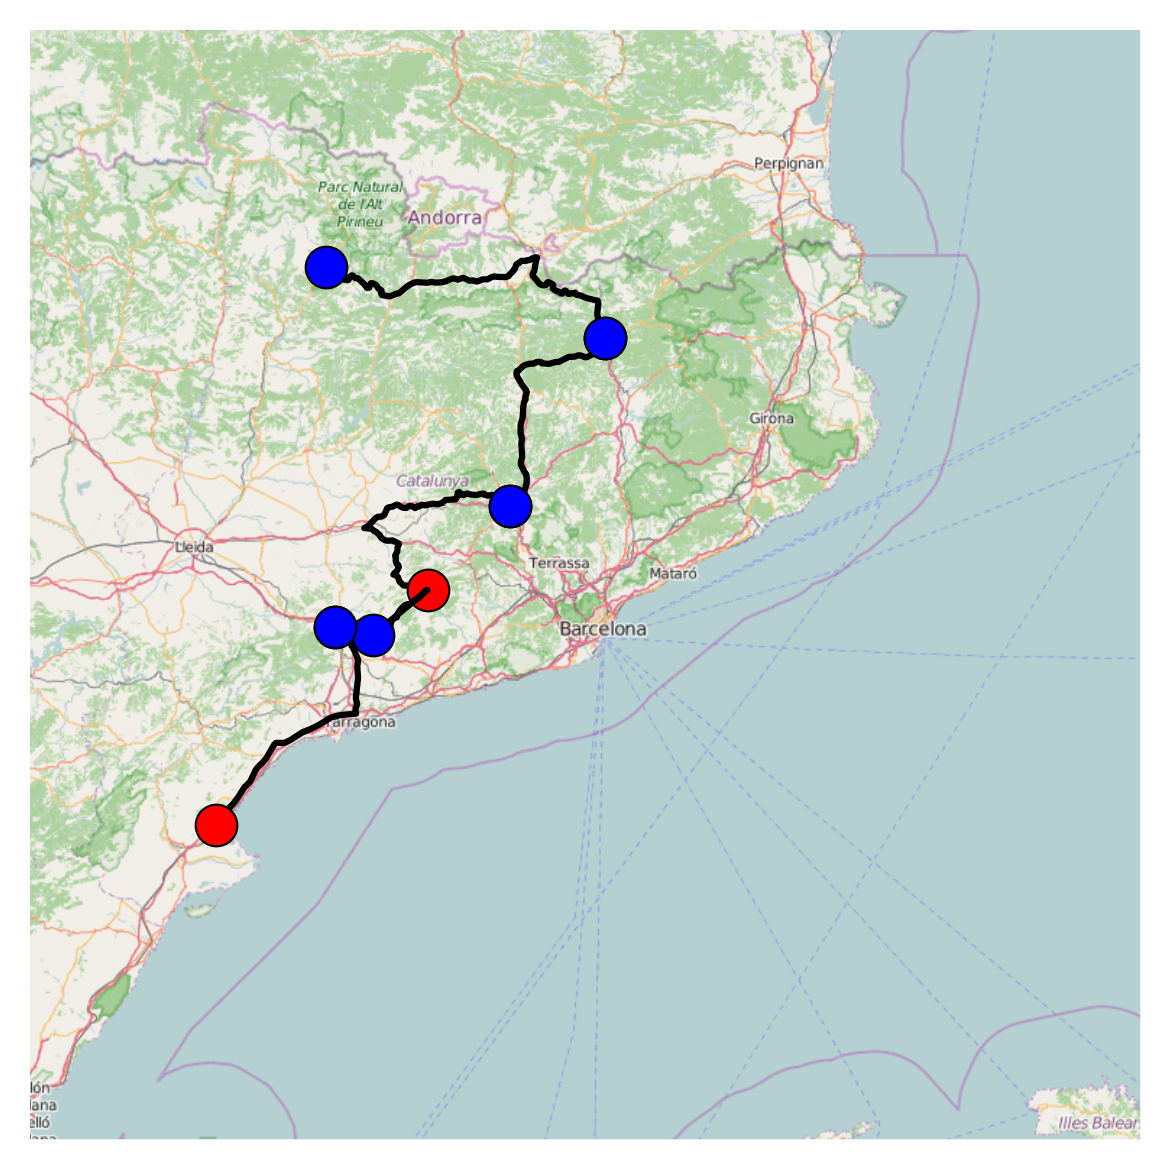

In [34]:
map = smopy.Map((41, 0.6, 42.5, 2.9))
# convert path in pixels to display it on the smopy map
linepath = []
plt.figure(figsize=(6,10));
map.show_mpl();
for path_single in path:
    linepath = get_full_path(path_single)
    #map.show_mpl();
    x, y = map.to_pixels(linepath[:,1], linepath[:,0])
    # show map
    
    
    # Plot the itinerary.
    plt.plot(x, y, '-k', lw=1.5);
    # Mark our two positions.
    plt.plot(x[0], y[0], 'ob', ms=10);
    plt.plot(x[-1], y[-1], 'or', ms=10);
print "Total Kms:",sum(total_dist)
print "Distance between points:",total_dist

In [32]:
# Compute the length of the road segments.
for n0, n1 in sg.edges_iter():
    path = get_path(n0, n1)
    distance = get_path_length(path)
    sg.edge[n0][n1]['distance'] = distance
    nodes = np.array(sg.nodes())
# Get the closest nodes in the graph.
pos0_i = np.argmin(np.sum((nodes[:,::-1] - pos0)**2, axis=1))
pos1_i = np.argmin(np.sum((nodes[:,::-1] - pos1)**2, axis=1))
# Compute the shortest path.
path = nx.shortest_path(sg, 
                        source=tuple(nodes[pos0_i]), 
                        target=tuple(nodes[pos1_i]),
                        weight='distance')
len(path)
roads = pd.DataFrame([sg.edge[path[i]][path[i + 1]] 
                      for i in range(len(path) - 1)], 
                     columns=['FULLNAME', 'MTFCC', 
                              'RTTYP', 'distance'])
roads
map = smopy.Map(pos0, pos1, z=7, margin=.1)
linepath = get_full_path(path)
x, y = map.to_pixels(linepath[:,1], linepath[:,0])

NameError: name 'pos0' is not defined

In [ ]:
plt.figure(figsize=(6,6));
map.show_mpl();
# Plot the itinerary.
plt.plot(x, y, '-k', lw=1.5);
# Mark our two positions.
plt.plot(x[0], y[0], 'ob', ms=10);
plt.plot(x[-1], y[-1], 'or', ms=10);

In [ ]:
print linepath

In [ ]:
print path